<a href="https://colab.research.google.com/github/ArmstrongVo/ArmstrongVo.github.io/blob/main/AI_W4_REVIEW_FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=54db96d6c5cabf13eb427befacf57dd7feeeee55178d90735495ccaeea826c2f
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-22-fece230bb10c>:92: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='z',offset =9,cmap ='viridis',anpha =0.5)
<ipython-input-22-fece230bb10c>:93: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='x',offset =11,cmap ='viridis',anpha =0.5)
<ipython-input-22-fece230bb10c>:94: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='y',offset =11,cmap ='viridis',anpha =0.5)


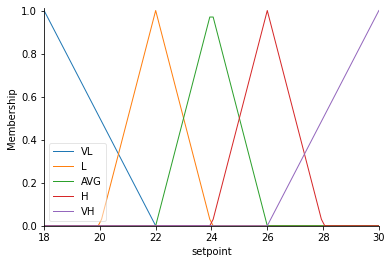

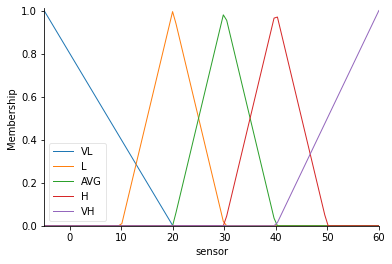

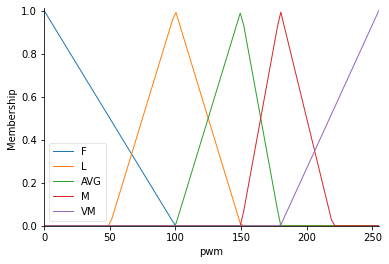

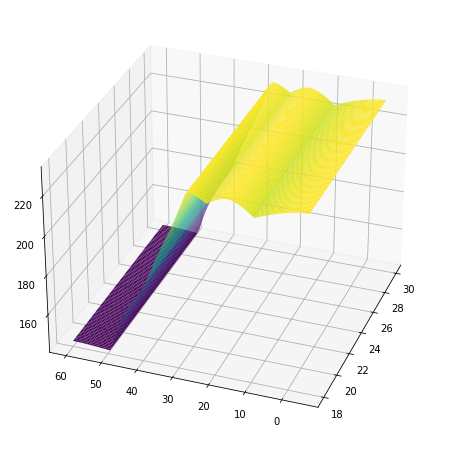

In [ ]:
# bài toán về điều khiển nhiệt độ
from matplotlib import figure
from skfuzzy.membership.generatemf import gaussmf
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

universe0 = np.linspace(18,30,100)
universe1 = np.linspace(-5,60,100)
universe2 = np.linspace(0,255,100)
setpoint = ctrl.Antecedent(universe0,'setpoint')
sensor = ctrl.Antecedent(universe1,'sensor')
pwm = ctrl.Consequent(universe2,'pwm')

setpoint['VL']=fuzz.trimf(setpoint.universe,[18,18,22])
setpoint['L']=fuzz.trimf(setpoint.universe,[20,22,24])
setpoint['AVG']=fuzz.trimf(setpoint.universe,[22,24,26]) 
setpoint['H']=fuzz.trimf(setpoint.universe,[24,26,28])
setpoint['VH']=fuzz.trimf(setpoint.universe,[26,30,30])

sensor['VL']=fuzz.trimf(sensor.universe,[-5,-5,20])
sensor['L']=fuzz.trimf(sensor.universe,[10,20,30])
sensor['AVG']=fuzz.trimf(sensor.universe,[20,30,40]) 
sensor['H']=fuzz.trimf(sensor.universe,[30,40,50])
sensor['VH']=fuzz.trimf(sensor.universe,[40,60,60])


pwm['F']=fuzz.trimf(pwm.universe,[0,0,100])
pwm['L']=fuzz.trimf(pwm.universe,[50,100,150])
pwm['AVG']=fuzz.trimf(pwm.universe,[100,150,180]) 
pwm['M']=fuzz.trimf(pwm.universe,[150,180,220])
pwm['VM']=fuzz.trimf(pwm.universe,[180,255,255])



#namesetpoint = ['VL','L','AVG','H','VH']
#namesensor = ['VL','L','AVG','H','VH']
#namepwm = ['F','L','AVG','M','VM']
#setpoint.automf(names = namesetpoint)
#sensor.automf(names = namesensor)
#pwm.automf(names = namepwm)

setpoint.view()
sensor.view()
pwm.view()

rule0 = ctrl.Rule(antecedent=((setpoint['L']&sensor['VL'])|(setpoint['AVG']&sensor['VL'])|
                              (setpoint['H']&sensor['VL'])|(setpoint['VH']&sensor['VL'])),
                              consequent=pwm['F'],label='rule FEW')

rule1 = ctrl.Rule(antecedent=((setpoint['VL']&sensor['VL'])|(setpoint['VL']&sensor['L'])|
                              (setpoint['AVG']&sensor['L'])|(setpoint['H']&sensor['L'])|
                              (setpoint['VH']&sensor['L'])),
                              consequent=pwm['L'],label='rule LITTLE')

rule2 = ctrl.Rule(antecedent=((setpoint['L']&sensor['AVG'])|(setpoint['VL']&sensor['H'])|
                              (setpoint['L']&sensor['H'])|(setpoint['AVG']&sensor['H'])|
                              (setpoint['H']&sensor['VH'])),
                              consequent=pwm['M'],label='rule MUCH')

rule3 = ctrl.Rule(antecedent=((setpoint['VL']&sensor['AVG'])|(setpoint['L']&sensor['L'])|
                              (setpoint['AVG']&sensor['AVG'])|(setpoint['H']&sensor['AVG'])|
                              (setpoint['VH']&sensor['AVG'])|(setpoint['H']&sensor['H'])|
                              (setpoint['VH']&sensor['H'])|(setpoint['VH']&sensor['VH'])),
                              consequent=pwm['AVG'],label='rule AVG')

rule4 = ctrl.Rule(antecedent=((setpoint['VL']&sensor['VH'])|(setpoint['L']&sensor['VH'])|
                              (setpoint['AVG']&sensor['VH'])),
                              consequent=pwm['VM'],label='rule VERYMUCH')





system =ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=100*100+1)
upsampled = np.linspace(18,30,100)
upsampled1 = np.linspace(-5,60,100)
x,y =np.meshgrid(upsampled,upsampled1)
z = np.zeros_like(x)
for i in range (100):
  for j in range (100):
    sim.input['setpoint']=x[i,j]
    sim.input['sensor']=y[i,j]
    sim.compute()
    z[[i,j]]=sim.output['pwm'] 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot (111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',antialiased=True,linewidth=0.4)
cset = ax.contourf(x,y,z,Zdir='z',offset =9,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='x',offset =11,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='y',offset =11,cmap ='viridis',anpha =0.5)
ax.view_init(30,200)




